In [2]:
import os 
import sys 
import cv2 
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [3]:
from tensorflow.keras.models import Model, Sequential, load_model 
from tensorflow.keras.layers import Activation, Dense, Input, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D 
from tensorflow.keras.optimizers import Adam, RMSprop 
from tensorflow.keras.utils import to_categorical, Sequence, model_to_dot 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler 
from tensorflow.keras.datasets import mnist 
from IPython.display import SVG 

In [4]:
def get_show_shape(images):
    for i in range(len(images)):
        print(f"shape : {images[i].shape}")

def get_show_plot_image(images, labels, ncols=15):
    fig, axes = plt.subplots(3, 5)
    fig.set_size_inches(12, 12)
    
    for i in range(ncols):
        ax = axes[i//5, i%5] 
        ax.imshow(images[i], cmap="gray")
        ax.axis("off")
        ax.set_title(str(labels[i]))
    
    plt.tight_layout()
    plt.show()

def get_show_plot_images_one(images, n_index):
    plt.figure(figsize=(5,5))
    plt.imshow(images[n_index], cmap="gray")
    plt.axis("off")
    plt.show()
    

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
get_show_shape([x_train, y_train, x_test, y_test])

shape : (60000, 28, 28)
shape : (60000,)
shape : (10000, 28, 28)
shape : (10000,)


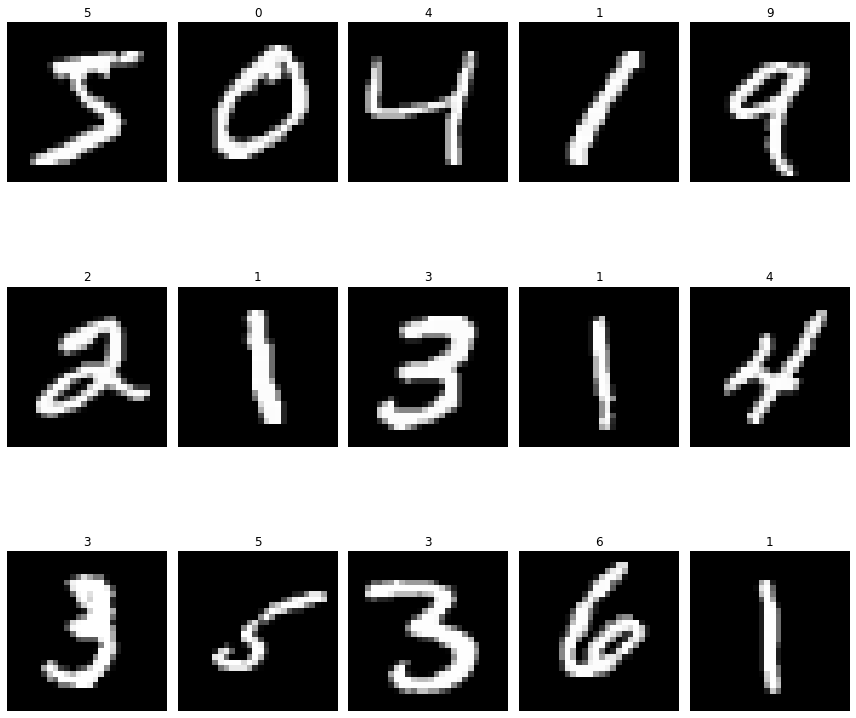

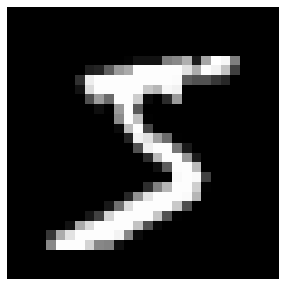

In [7]:
get_show_plot_image(x_train[:15], y_train[:15])
get_show_plot_images_one(x_train, 0)

In [8]:
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0 255
0 255


In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())
print(x_train.shape)
print(x_test.shape)

0.0 1.0
0.0 1.0
(60000, 28, 28)
(10000, 28, 28)


In [10]:
x_train_in = x_train[..., tf.newaxis]
x_test_in = x_test[..., tf.newaxis]
print(x_train_in.shape)
print(x_test_in.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
def set_create_model(): 
    # input_tensor = Input(shape=(28, 28, 1))

    # x = Conv2D(filters=32, kernel_size=(3, 3), name="conv1")(input_tensor)
    # x = Activation("relu")(x)
    # x = MaxPooling2D(2, 2)(x)
    # x = Flatten()(x)
    # output = Dense(10, activation="softmax")(x)

    # model = Model(inputs=input_tensor, outputs=output)
    model = tf.keras.Sequential([  
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1), name='conv'),
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
    ])
    
    return model 

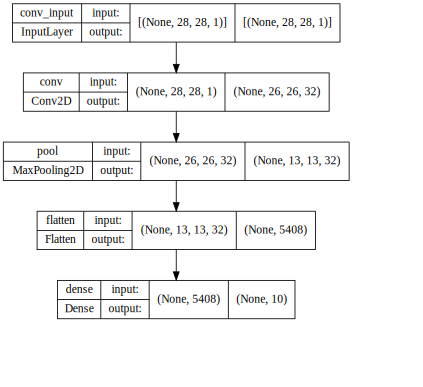

In [12]:
model =  set_create_model()
SVG(model_to_dot(model, show_shapes=True, dpi=60).create(prog="dot", format="svg"))

In [13]:
model.compile(optimizer=Adam(lr=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x_train_in, y_train, 
                    validation_data = (x_test_in, y_test), 
                    epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 16s 3ms/step - loss: 0.2052 - accuracy: 0.9421 - val_loss: 0.0831 - val_accuracy: 0.9765
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0758 - accuracy: 0.9779 - val_loss: 0.0694 - val_accuracy: 0.9784
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0585 - accuracy: 0.9830 - val_loss: 0.0622 - val_accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0483 - accuracy: 0.9857 - val_loss: 0.0525 - val_accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0407 - accuracy: 0.9877 - val_loss: 0.0585 - val_accuracy: 0.9815
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0517 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9910 - val_loss: 0.0555 - val_accuracy

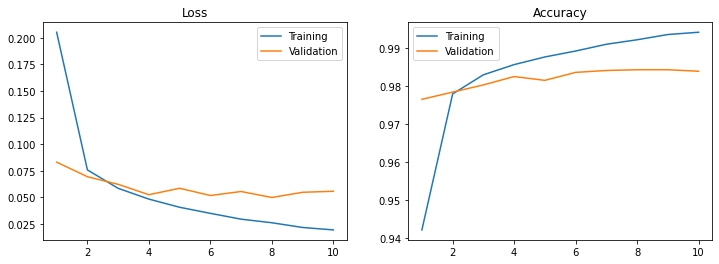

In [14]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

In [28]:
model.input
model.output
model.layers
# model.layers[0].input
# model.layers[0].output
# model.layers[0].weights
# model.layers[0].bias
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-6.46140516e-01,  3.61693464e-03,  2.93885350e-01,
           1.99896246e-01,  2.75750786e-01, -7.54645526e-01,
           3.74065787e-01, -3.59194688e-02, -1.24858372e-01,
           2.74518013e-01, -2.64977198e-03,  3.33937228e-01,
           1.25586733e-01, -1.43077028e+00,  4.87564951e-01,
           1.07071176e-02, -4.68771785e-01, -9.39722434e-02,
           3.49217296e-01, -3.13360751e-01, -1.02752721e+00,
          -1.00659680e+00,  7.89929330e-01,  2.79098451e-01,
           7.18051568e-02,  2.28863642e-01,  3.14737141e-01,
          -6.18697882e-01, -8.91852677e-01,  1.87858313e-01,
          -5.75188220e-01, -1.70037568e-01]],

        [[-4.32496369e-02,  5.00734448e-01, -1.45166650e-01,
           1.55331805e-01,  4.07111973e-01, -2.62505203e-01,
          -9.89276394e-02,  4.84727949e-01,  3.51929665e-01,
           3.70229423e-01, -5.67806065e-01,  4.28962648e-01,
           4.54864264e-01, -

In [21]:
activator = Model(inputs = model.input, 
                  outputs = [layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])
len(activations)

2

In [30]:
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

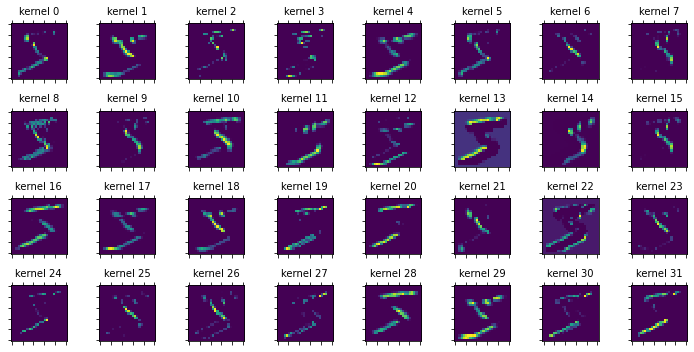

In [31]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

(1, 13, 13, 32)


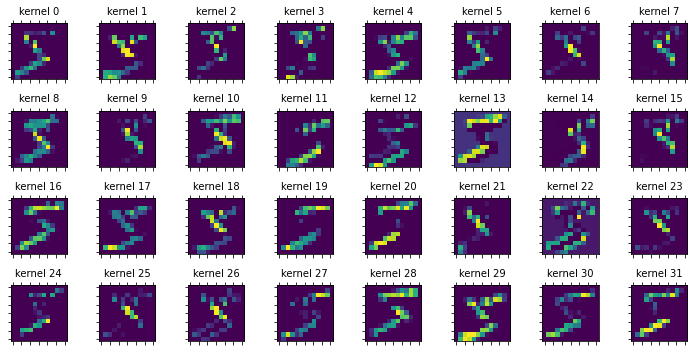

In [34]:

pooling_activation = activations[1]
print(pooling_activation.shape)

fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)
    

plt.tight_layout()
plt.show()